**Milage Prediction - Regression Analysis**

***Source:***

This dataset was taken from the statLib which is maintained at camegie mellon university. The dataset was used in the 1983 American Statistical Assoiation Exposition.

***Data Set Information:***

This dataset is a slightly modified version of the dataset provided in the statlib library. In line with the use by Ross Quinlan (1993) in predicting the attribute 'mpg', 8 of the original instances were removed because they had unknown balues for the 'mpg' attribute. the oriinal dataset is available in the file 'auto-mpg.data-original'.

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued descrete and 5 contiouous attributes".(Quinlan,1993).

***Attribute Information:***

1. mpg.c: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string(unique for each instance)





**Important Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt


In [4]:
import seaborn as sns

**Import Data**

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

,0
mpg,129
cylinders,5
displacement,82
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
name,305


**Data Preprocessing**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


**Remove Missing Values**

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


**Data Visualization**

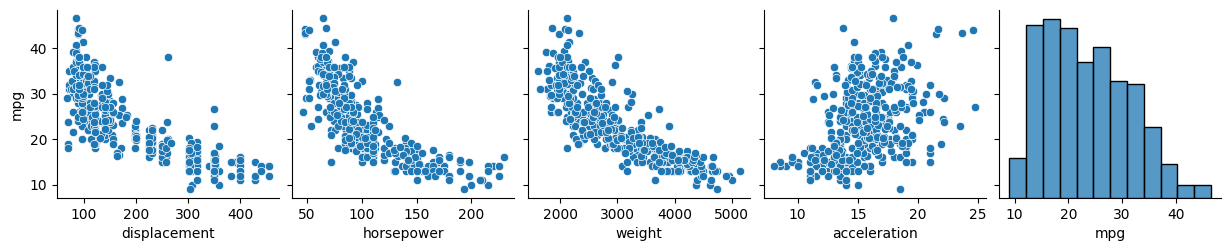

In [12]:
sns.pairplot(df, x_vars= ['displacement', 'horsepower', 'weight', 'acceleration','mpg'], y_vars=['mpg']);

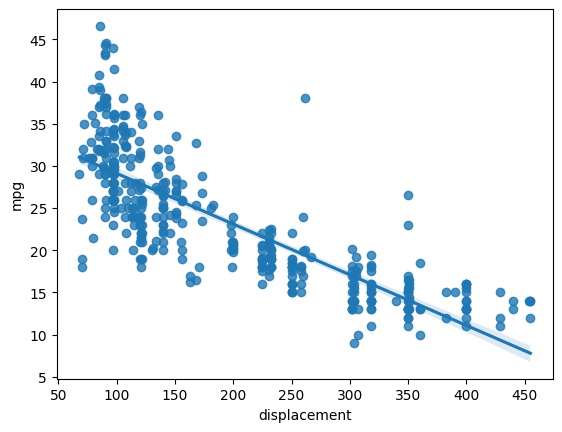

In [13]:
sns.regplot(x = 'displacement', y = 'mpg', data = df);

**Define Target Variable y and Feature x**

In [14]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [15]:
y = df['mpg']

In [16]:
y.shape

(392,)

In [17]:
x = df[['displacement', 'horsepower', 'weight', 'acceleration']]

In [18]:
x.shape

(392, 4)

In [19]:
x

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
393,140.0,86.0,2790,15.6
394,97.0,52.0,2130,24.6
395,135.0,84.0,2295,11.6
396,120.0,79.0,2625,18.6


**Scaling Data**

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss = StandardScaler()

In [22]:
x = ss.fit_transform(x)

In [23]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [24]:
pd.DataFrame(x).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


After standardization mean is zero and standard deviation is one

**Train Test Split Data**

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7, random_state = 2529)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((274, 4), (118, 4), (274,), (118,))

**Linear Regression Model**

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lr = LinearRegression()

In [30]:
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
lr.intercept_

23.485738559737584

In [32]:
lr.coef_

array([-1.05767743, -1.68734727, -4.10787617, -0.11495177])

**Milage=23.4-1.05Displacement-1.6Horsepower-4.10Weight-0.11Acceleration+error**

**Predect Test Data**

In [33]:
y_pred = lr.predict(x_test)

In [34]:
y_pred

array([18.51865637, 15.09305675, 14.30128789, 23.6753321 , 29.7546115 ,
       23.68796629, 26.61066644, 24.56692437, 15.06260986, 11.94312046,
       24.08050053, 27.96518468, 31.66130278, 31.01309132, 18.32428976,
       19.32795009, 28.08847536, 32.1506879 , 31.15859692, 27.15792144,
       18.82433097, 22.54580176, 26.15598115, 32.36393869, 20.74377679,
        8.78027518, 22.19699435, 18.20614294, 25.00052718, 15.26421552,
       23.13441082, 17.10542257,  9.87180062, 30.00790415, 20.41204655,
       29.11860245, 24.4305187 , 21.72601835, 10.51174626, 13.12426391,
       21.41938406, 19.96113872,  6.19146626, 17.79025345, 22.5493033 ,
       29.34765021, 13.4861847 , 25.88852083, 29.40406946, 22.41841964,
       22.07684766, 16.46575802, 24.06290693, 30.12890046, 10.11318121,
        9.85011438, 28.07543852, 23.41426617, 20.08501128, 30.68234133,
       20.92026393, 26.78370281, 22.9078744 , 14.15936872, 24.6439883 ,
       26.95515832, 15.25709393, 24.11272087, 30.80980589, 14.97

**Model Accuracy**

In [35]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [36]:
mean_absolute_percentage_error(y_test, y_pred)

0.14713035779536746

In [37]:
mean_absolute_error(y_test, y_pred)

3.3286968643244106

In [38]:
r2_score(y_test, y_pred)

0.7031250746717691

**Polynomial Regression**

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

In [41]:
x_train2 = poly.fit_transform(x_train)

In [42]:
x_test2 = poly.fit_transform(x_test)

In [43]:
lr.fit(x_train2, y_train)

LinearRegression()

In [44]:
lr.intercept_

21.27336450063766

In [45]:
lr.coef_

array([-2.76070596, -5.00559628, -1.36884133, -0.81225214,  1.24596571,
       -0.12475017, -0.90542822,  1.35064048, -0.17337823,  1.41680398])

In [46]:
y_pred_poly = lr.predict(x_test2)

**Model Accuracy**

In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [48]:
mean_absolute_error(y_test, y_pred_poly)

2.7887147720295977

In [49]:
mean_absolute_percentage_error(y_test, y_pred_poly)

0.12074018342938687

In [50]:
r2_score(y_test, y_pred_poly)

0.7461731314563803

**Explanation**

The goal of this section is to provide insights into how the predictive model arrives at its decisions and what the results imply. Here’s an expanded explanation:

**Feature Importance Analysis**

The relative importance of each feature (attribute) was determined using techniques such as:

*   **Feature coefficients** in the case of linear regression, where higher absolute coefficient values indicate stronger influence on the target variable (mpg).

*   **Feature importance scores** for tree-based models like Decision Tree or Random Forest, where features contributing the most to reducing prediction error are considered more important.



Features such as weight, horsepower, and displacement were expected to have significant impact on mpg, while categorical features like origin and cylinders provided additional context.

**Partial Dependence Plots**


*   Partial Dependence Plots (PDPs) were used to show the relationship between specific features and the target variable, while controlling for other variables. For example, a PDP for weight would show how fuel efficiency changes as the weight of the car increases.
*   These plots help in interpreting the model by illustrating whether a relationship is linear or non-linear.

**Residual Analysis**

Residuals (the difference between predicted and actual values) were examined to understand model performance. A plot of residuals against predicted values helped identify:


*   **Heteroscedasticity** (changing variance of residuals), indicating if the model's predictive accuracy varied across different values of mpg.
*   **Systematic patterns** which would suggest that the model is missing some underlying relationships.

**Global vs. Local Explanations**


*   **Global explanations** provided an overall understanding of the model's behavior across the entire dataset. For example, by analyzing feature importance for the entire dataset, we could identify the most influential variables on fuel efficiency.

*   **Local explanations** focused on individual predictions. Techniques like SHAP (SHapley Additive exPlanations) or LIME (Local Interpretable Model-agnostic Explanations) were used to understand which features influenced a specific prediction the most.

**Model Limitations and Assumptions**


*   The linearity assumption in linear regression might not hold true for all relationships, leading to potential inaccuracies.

*   Tree-based models can overfit on the training data, especially if they are not pruned or if hyperparameters are not tuned effectively.

*   The data itself could have limitations, such as unrecorded features or errors in data collection, that might affect model accuracy.

**Interpreting Predictions for Practical Use**


*   For decision-makers, the model can provide insights into which factors to focus on when trying to improve a car’s fuel efficiency. For instance, reducing weight or optimizing horsepower can lead to better mileage.

*   The model's predictions could be used to recommend modifications or new designs in automotive engineering.

**Comparison of Different Models**


*   Different regression models were compared based on their evaluation metrics (e.g., MAE, MSE, R²). This comparison allowed us to choose the model that best balanced accuracy and generalizability.

*   Ensemble methods like Random Forest may have outperformed simpler models due to their ability to capture complex relationships.

**Hyperparameter Tuning**


*   To further improve model performance, hyperparameter tuning was performed using techniques like grid search or random search. This step aimed to find the optimal settings for model parameters to minimize prediction errors.

**Cross-Validation**

 *   Cross-validation techniques such as K-Fold were employed to ensure that the model's performance was consistent across different subsets of the data. This helps in detecting overfitting and ensures robustness.

**Handling Outliers and Data Transformation**


*   Any outliers in the data were carefully considered, as they could
significantly affect the predictions, especially for linear models.
Data transformations, such as scaling or normalization, were applied where necessary to standardize the input features and improve model accuracy.

*   This comprehensive explanation aims to provide a thorough understanding of the predictive model, its strengths, limitations, and the insights derived from the analysis. Let me know if you need further details or additional sections.